In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
pairs_df = pd.read_csv('/Users/sriramsachitchunduri/Desktop/StatiticalArbitrage/high_corr_cointegrated_pairs.csv')
# Select a pair (example: ADP-GDDY)
pair = pairs_df.iloc[0]  # Pick the top pair (lowest p-value)
stock1, stock2 = pair['Stock1'], pair['Stock2']
print(f"Trading Pair: {stock1} - {stock2}")

Trading Pair: ADI - AMAT


In [29]:
df = pd.read_csv('HS_3650_Minute_All.csv')

KeyboardInterrupt: 

Loaded 40 pairs from high_corr_cointegrated_pairs.csv
Available tickers: ['AAPL', 'ACN', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AMAT', 'AMD', 'ANET', 'APH', 'ASML', 'ASX', 'AVGO', 'BR', 'CDNS', 'CDW', 'CHKP', 'CPAY', 'CRM', 'CRWD', 'CSCO', 'CTSH', 'CYBR', 'DDOG', 'DELL', 'ERIC', 'FI', 'FICO', 'FIS', 'FTNT', 'GDDY', 'GIB', 'GLW', 'GRMN', 'HPE', 'HPQ', 'HUBS', 'IBM', 'INFY', 'INTC', 'INTU', 'IT', 'JBL', 'KEYS', 'KLAC', 'LDOS', 'LRCX', 'MCHP', 'MPWR', 'MRVL', 'MSFT', 'MSI', 'MSTR', 'MU', 'NET', 'NOK', 'NOW', 'NTAP', 'NVDA', 'NXPI', 'ON', 'ORCL', 'PANW', 'PAYX', 'PLTR', 'PTC', 'QCOM', 'ROP', 'SAP', 'SHOP', 'SMCI', 'SNOW', 'SNPS', 'SONY', 'SSNC', 'STM', 'STX', 'TDY', 'TEAM', 'TEL', 'TSM', 'TXN', 'TYL', 'UBER', 'UI', 'VRSN', 'WDAY', 'WDC', 'WIT', 'XYZ', 'ZM', 'ZS']
Processing pair 1/40: ADI-AMAT
Processing pair 2/40: ADI-KLAC
Processing pair 3/40: ADI-MCHP


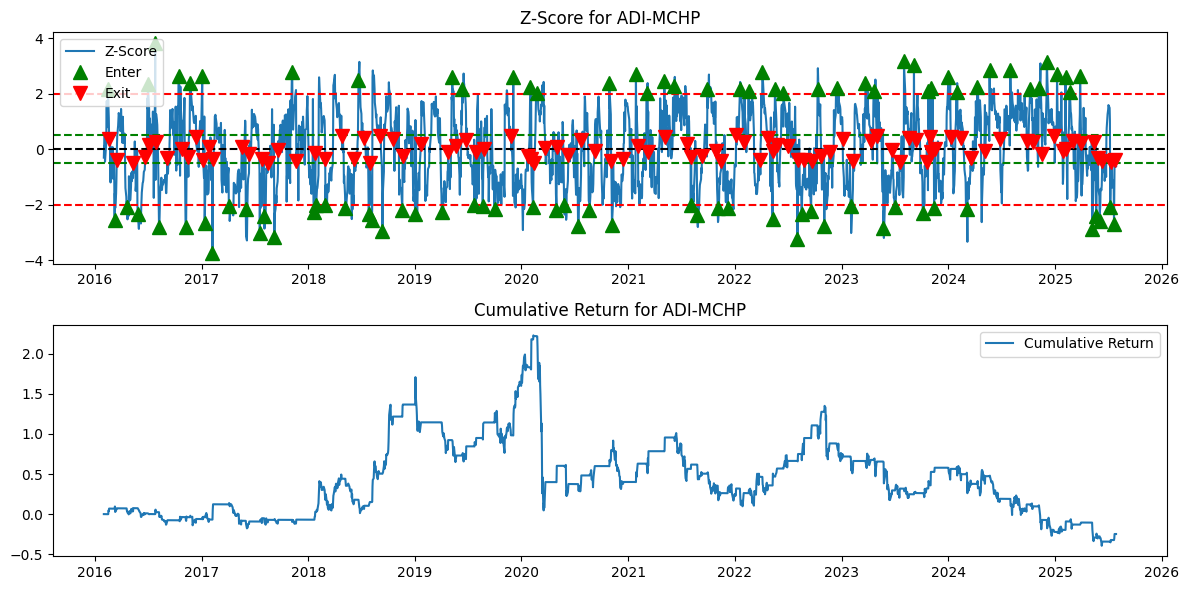

Processing pair 4/40: NXPI-ON
Processing pair 5/40: NXPI-TXN
Processing pair 6/40: LRCX-NXPI
Processing pair 7/40: LRCX-MU
Processing pair 8/40: LRCX-MCHP
Processing pair 9/40: KLAC-TXN
Processing pair 10/40: KLAC-NXPI
Processing pair 11/40: LRCX-TSM
Processing pair 12/40: LRCX-TXN
Processing pair 13/40: MPWR-NXPI
Processing pair 14/40: MCHP-STM
Processing pair 15/40: MCHP-NXPI
Processing pair 16/40: KLAC-MPWR
Processing pair 17/40: CRWD-ZS
Processing pair 18/40: ADI-LRCX
Processing pair 19/40: KLAC-MCHP
Processing pair 20/40: AMD-NVDA
Processing pair 21/40: ASML-LRCX
Processing pair 22/40: ASML-KLAC
Processing pair 23/40: AMAT-ASML
Processing pair 24/40: AMAT-KLAC


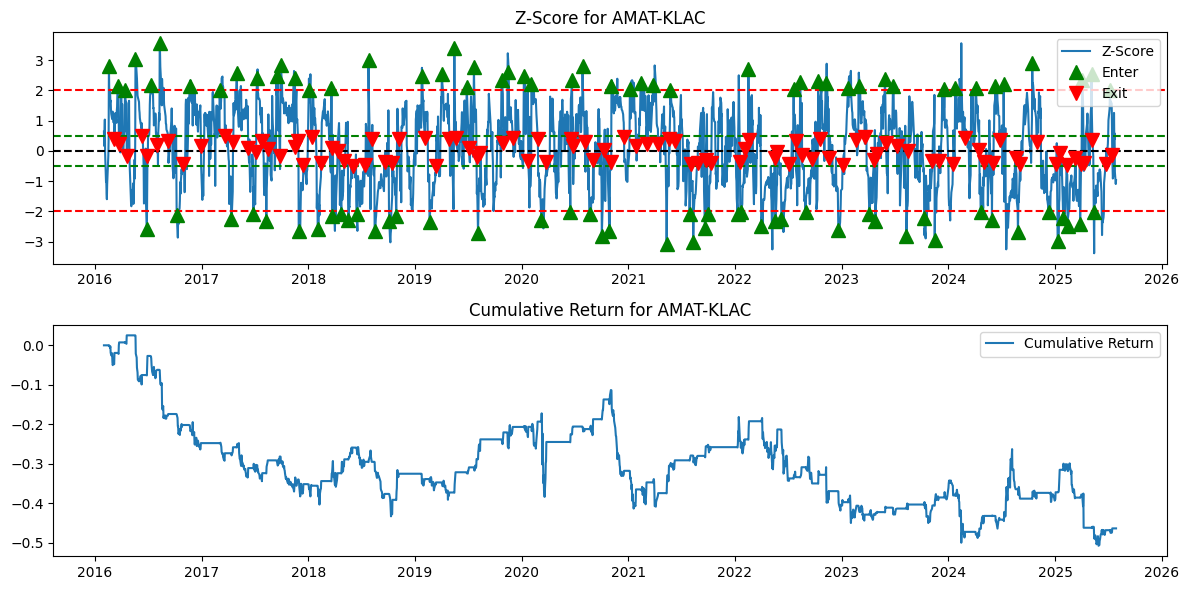

Processing pair 25/40: ADI-STM
Processing pair 26/40: ADI-ON
Processing pair 27/40: ADI-TXN
Processing pair 28/40: AMAT-LRCX


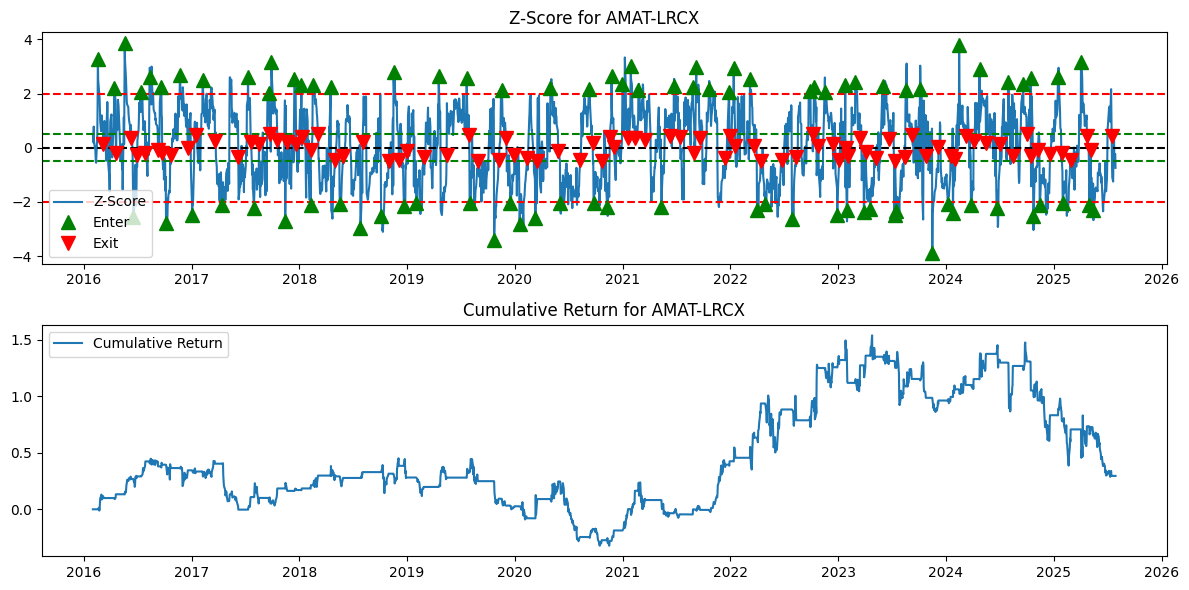

Processing pair 29/40: AMAT-MCHP
Processing pair 30/40: AMAT-MPWR
Processing pair 31/40: AMAT-ON
Processing pair 32/40: AMAT-NXPI
Processing pair 33/40: KLAC-LRCX


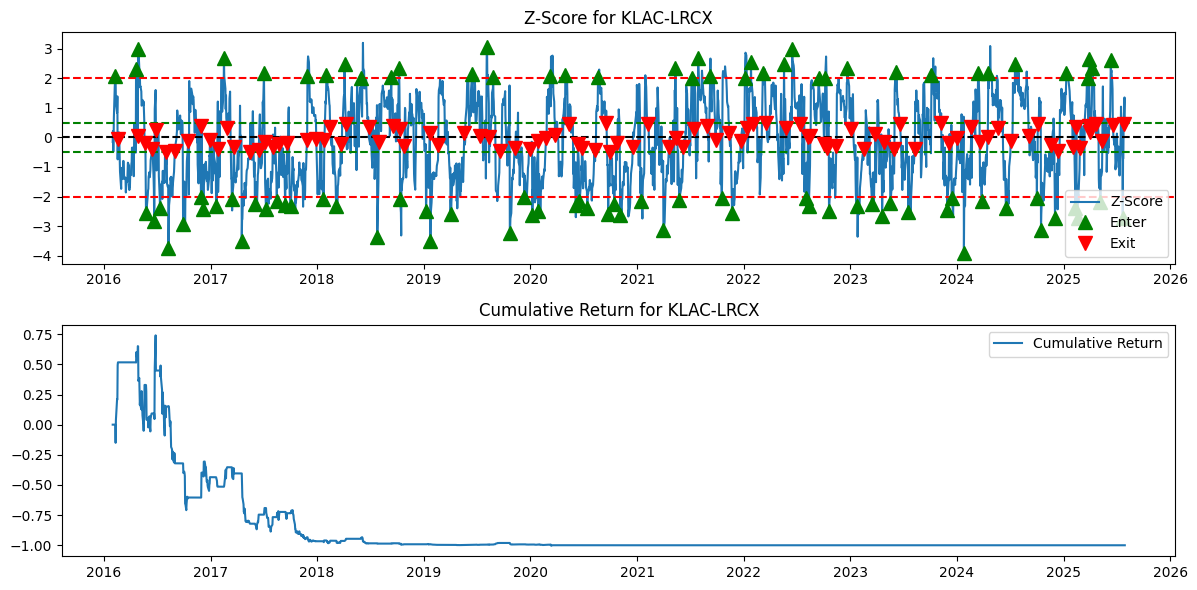

Processing pair 34/40: CDNS-SNPS


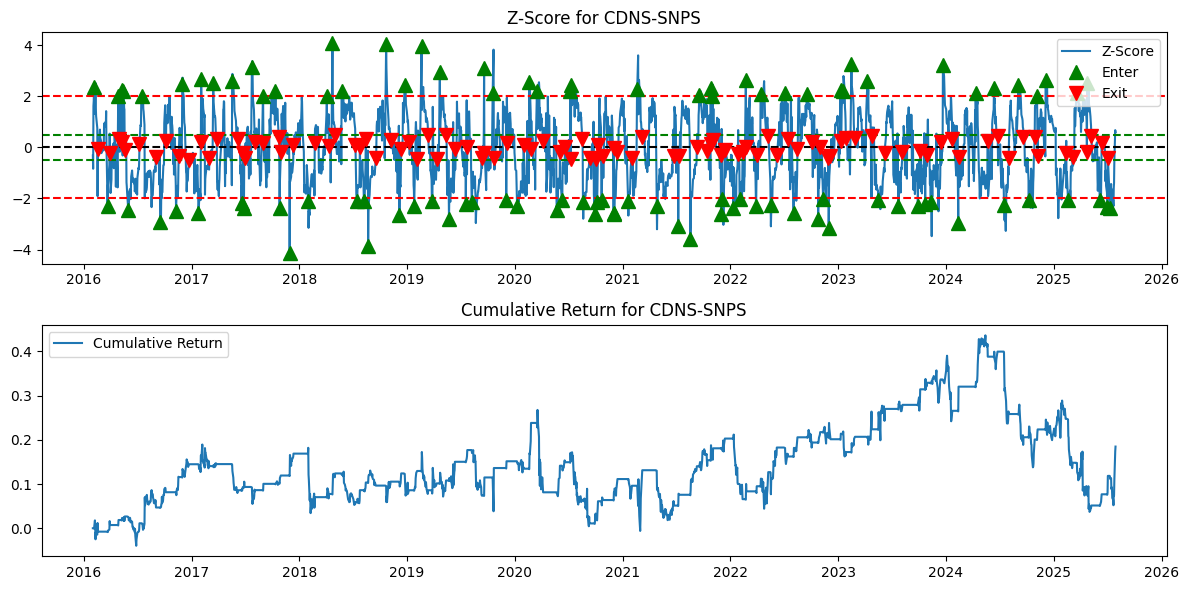

Processing pair 35/40: ADP-PAYX
Processing pair 36/40: MCHP-ON
Processing pair 37/40: MCHP-TXN
Processing pair 38/40: LRCX-MPWR
Processing pair 39/40: NXPI-STM
Processing pair 40/40: ADI-NXPI
Trading Results for All Pairs (sorted by Total Return):
   Stock1 Stock2  Total Return  Number of Trades  Sharpe Ratio  Hedge Ratio
13   MCHP    STM     12.908848               102      1.033569     1.458394
1     ADI   KLAC      2.432983                97      0.812112     0.223821
30   AMAT     ON      1.927918               100      0.474985     1.892499
31   AMAT   NXPI      1.715514                87      0.587160     1.008559
4    NXPI    TXN      1.419621                92      0.561764     1.099400
14   MCHP   NXPI      1.242435                99      0.500070     0.325890
7    LRCX   MCHP      1.027784               107      0.430603     1.214263
26    ADI    TXN      1.023600               100      0.568502     1.109997
10   LRCX    TSM      0.981146                97      0.429939     0

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load pairs CSV
pairs_csv_path = 'high_corr_cointegrated_pairs.csv'  # Adjust path if needed
pairs_df = pd.read_csv(pairs_csv_path)
print(f"Loaded {len(pairs_df)} pairs from {pairs_csv_path}")

# Load historical data (uncomment the appropriate option)
# Option 1: If historical data is already a DataFrame named 'df'
df = df.copy()  # Replace 'df' with your DataFrame name

# Option 2: If historical data is in a CSV
# historical_csv_path = 'historical_data.csv'  # Adjust path
# df = pd.read_csv(historical_csv_path)

# Prepare historical data
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)

# Aggregate to daily closes (last close per day per symbol)
daily_df = df.groupby([df['timestamp'].dt.date, 'symbol'])['close'].last().reset_index()
daily_df['timestamp'] = pd.to_datetime(daily_df['timestamp'])
close_prices = daily_df.pivot_table(index='timestamp', columns='symbol', values='close')
close_prices = close_prices.dropna(axis=1, thresh=len(close_prices) * 0.5)  # Drop stocks with >50% NaNs
print(f"Available tickers: {list(close_prices.columns)}")

# Initialize results
results = []
lookback = 20  # Rolling window for spread mean/std
entry_threshold = 2.0  # Z-score for entry
exit_threshold = 0.5   # Z-score for exit
transaction_cost = 0.001  # 0.1% per trade

# Test each pair
for idx, pair in pairs_df.iterrows():
    stock1, stock2 = pair['Stock1'], pair['Stock2']
    print(f"Processing pair {idx + 1}/{len(pairs_df)}: {stock1}-{stock2}")
    
    # Check if both stocks are in data
    if stock1 not in close_prices.columns or stock2 not in close_prices.columns:
        print(f"  Skipping {stock1}-{stock2}: Missing data")
        continue
    
    # Get prices
    prices1 = close_prices[stock1].dropna()
    prices2 = close_prices[stock2].dropna()
    common_index = prices1.index.intersection(prices2.index)
    if len(common_index) < lookback:
        print(f"  Skipping {stock1}-{stock2}: Insufficient data ({len(common_index)} days)")
        continue
    prices1 = prices1.loc[common_index]
    prices2 = prices2.loc[common_index]
    
    # Compute hedge ratio
    X = sm.add_constant(prices2)
    model = sm.OLS(prices1, X).fit()
    hedge_ratio = model.params[stock2]
    
    # Compute spread and z-score
    spread = prices1 - hedge_ratio * prices2
    spread_mean = spread.rolling(window=lookback).mean()
    spread_std = spread.rolling(window=lookback).std()
    z_score = (spread - spread_mean) / spread_std
    
    # Create signals DataFrame
    signals = pd.DataFrame({
        'spread': spread,
        'z_score': z_score,
        'price1': prices1,
        'price2': prices2
    }).dropna()
    
    # Generate signals
    signals['position'] = 0  # 0: no position, 1: long stock1/short stock2, -1: short stock1/long stock2
    signals['signal'] = 0  # 1: enter, -1: exit
    for i in range(1, len(signals)):
        z = signals['z_score'].iloc[i]
        prev_z = signals['z_score'].iloc[i-1]
        prev_position = signals['position'].iloc[i-1]
        if prev_position == 0:
            if z > entry_threshold:
                signals.loc[signals.index[i], 'position'] = -1
                signals.loc[signals.index[i], 'signal'] = 1
            elif z < -entry_threshold:
                signals.loc[signals.index[i], 'position'] = 1
                signals.loc[signals.index[i], 'signal'] = 1
        elif prev_position == 1 and abs(z) < exit_threshold:
            signals.loc[signals.index[i], 'position'] = 0
            signals.loc[signals.index[i], 'signal'] = -1
        elif prev_position == -1 and abs(z) < exit_threshold:
            signals.loc[signals.index[i], 'position'] = 0
            signals.loc[signals.index[i], 'signal'] = -1
        else:
            signals.loc[signals.index[i], 'position'] = prev_position
    
    # Calculate returns
    signals['return1'] = signals['price1'].pct_change()
    signals['return2'] = signals['price2'].pct_change()
    signals['pair_return'] = np.where(
        signals['position'].shift(1) == 1,
        signals['return1'] - hedge_ratio * signals['return2'],
        np.where(
            signals['position'].shift(1) == -1,
            -signals['return1'] + hedge_ratio * signals['return2'],
            0
        )
    )
    signals['pair_return'] -= transaction_cost * abs(signals['signal'])
    
    # Cumulative returns
    signals['cumulative_return'] = (1 + signals['pair_return']).cumprod() - 1
    
    # Metrics
    total_return = signals['cumulative_return'].iloc[-1] if len(signals) > 0 else np.nan
    num_trades = len(signals[signals['signal'] == 1])
    sharpe = signals['pair_return'].mean() / signals['pair_return'].std() * np.sqrt(252) if signals['pair_return'].std() != 0 else 0
    
    results.append({
        'Stock1': stock1,
        'Stock2': stock2,
        'Total Return': total_return,
        'Number of Trades': num_trades,
        'Sharpe Ratio': sharpe,
        'Hedge Ratio': hedge_ratio
    })
    
    # Plot top pairs (e.g., top 5 by correlation)
    if pair['Correlation'] >= pairs_df['Correlation'].nlargest(5).min():
        plt.figure(figsize=(12, 6))
        plt.subplot(2, 1, 1)
        plt.plot(signals['z_score'], label='Z-Score')
        plt.axhline(0, color='black', linestyle='--')
        plt.axhline(entry_threshold, color='red', linestyle='--')
        plt.axhline(-entry_threshold, color='red', linestyle='--')
        plt.axhline(exit_threshold, color='green', linestyle='--')
        plt.axhline(-exit_threshold, color='green', linestyle='--')
        plt.plot(signals[signals['signal'] == 1].index, signals['z_score'][signals['signal'] == 1], '^', markersize=10, color='g', label='Enter')
        plt.plot(signals[signals['signal'] == -1].index, signals['z_score'][signals['signal'] == -1], 'v', markersize=10, color='r', label='Exit')
        plt.title(f'Z-Score for {stock1}-{stock2}')
        plt.legend()
        
        plt.subplot(2, 1, 2)
        plt.plot(signals['cumulative_return'], label='Cumulative Return')
        plt.title(f'Cumulative Return for {stock1}-{stock2}')
        plt.legend()
        plt.tight_layout()
        plt.show()

# Display and save results
results_df = pd.DataFrame(results)
print("Trading Results for All Pairs (sorted by Total Return):")
print(results_df.sort_values('Total Return', ascending=False))
results_df.to_csv('all_pairs_trading_results.csv', index=False)
print("Results saved to 'all_pairs_trading_results.csv'")

In [ ]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stock1            40 non-null     object 
 1   Stock2            40 non-null     object 
 2   Total Return      40 non-null     object 
 3   Number of Trades  40 non-null     int64  
 4   Sharpe Ratio      40 non-null     float64
 5   Hedge Ratio       40 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ KB


In [ ]:
results_df["Total Return"].sum()

np.float64(19.775155271059795)

In [ ]:
# Step 1: Convert all values to string explicitly (if needed)
results_df["Total Return"] = results_df["Total Return"].astype(str)

# Step 2: Remove % symbol or other unwanted characters
results_df["Total Return"] = results_df["Total Return"].str.replace('%', '', regex=False)

# Step 3: Convert cleaned string to float
results_df["Total Return"] = pd.to_numeric(results_df["Total Return"], errors='coerce')

# Step 4: Now you can safely filter for negative values
negative_returns_df = results_df[results_df["Total Return"] < 0]


In [ ]:
negative_returns_df.head()

,Stock1,Stock2,Total Return,Number of Trades,Sharpe Ratio,Hedge Ratio
